## Stock Market Price analysis of four tech giants - Apple, Google, IBM and Microsoft

## Step 1: Let us import basic libraries needed to import the data :

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("C:\\Users\\win10\\Desktop\\UpxDSC\\Exclusively-Programming\\Data-Analytics-with-Python\\Datasets\\")

In [3]:
aapl = pd.read_csv('apple.csv', index_col = 'Date')

In [4]:
aapl.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-31,105.660004,106.570000,105.639999,106.099998,103.465584,29662400
2016-09-01,106.139999,106.800003,105.620003,106.730003,104.079956,26701500


In [5]:
google = pd.read_csv('google.csv', index_col = 'Date')

In [6]:
microsoft = pd.read_csv('microsoft.csv', index_col = 'Date')

In [7]:
ibm = pd.read_csv('ibm.csv', index_col = 'Date')

## Step 2: After successfully loading all the four datasets, lets perform some basic aggregation and addition of new columns which helps in data analysis

In [8]:
mov_avg = google['Volume'].rolling(5).mean()

In [9]:
mov_avg.head(7)

Date
2016-08-31          NaN
2016-09-01          NaN
2016-09-02          NaN
2016-09-06          NaN
2016-09-07    1371920.0
2016-09-08    1392680.0
2016-09-09    1509500.0
Name: Volume, dtype: float64

In [10]:
google['lag1'] = google.Close.shift(1)
google['lead1'] = google.Close.shift(-1)
google.head()

,Open,High,Low,Close,Adj Close,Volume,lag1,lead1
Date,,,,,,,,
2016-08-31,789.599976,791.570007,787.200012,789.849976,789.849976,1071400,NaN,791.400024
2016-09-01,791.979980,792.890015,786.330017,791.400024,791.400024,1303500,789.849976,796.869995
2016-09-02,795.270020,797.099976,793.260010,796.869995,796.869995,1349900,791.400024,808.020020
2016-09-06,798.390015,810.890015,795.429993,808.020020,808.020020,1989500,796.869995,807.989990
2016-09-07,807.929993,810.599976,803.719971,807.989990,807.989990,1145300,808.020020,802.840027


In [11]:
google.pct_change().head() * 100

,Open,High,Low,Close,Adj Close,Volume,lag1,lead1
Date,,,,,,,,
2016-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,0.301419,0.166758,-0.110518,0.196246,0.196246,21.663244,NaN,0.691177
2016-09-02,0.415420,0.530964,0.881308,0.691177,0.691177,3.559647,0.196246,1.399228
2016-09-06,0.392319,1.730026,0.273553,1.399228,1.399228,47.381288,0.691177,-0.003716
2016-09-07,1.194902,-0.035768,1.042201,-0.003716,-0.003716,-42.432772,1.399228,-0.637380


## Step 3: Let us import standard libraries required for basic visualization

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

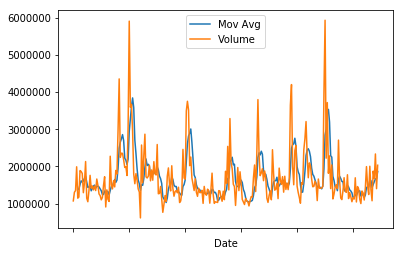

In [13]:
mov_avg.plot(label = 'Mov Avg')
google['Volume'].plot(label = 'Volume')
plt.legend(loc = 'best')
plt.show()

## Step 4: Time to combine all the four datasets for purpose of comparison and other EDA

In [14]:
ticker = ['AAPL', 'GOOGLE', 'MSFT', 'IBM']

In [15]:
tech_stocks = pd.concat([aapl, google, microsoft, ibm], axis = 1, keys = ticker)

In [16]:
tech_stocks.head(3)

AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2016-08-31  105.660004  106.570000  105.639999  106.099998  103.465584   
2016-09-01  106.139999  106.800003  105.620003  106.730003  104.079956   
2016-09-02  107.699997  108.000000  106.820000  107.730003  105.055122   

                          GOOGLE                                       ...     \
              Volume        Open        High         Low       Close   ...      
Date                                                                   ...      
2016-08-31  29662400  789.599976  791.570007  787.200012  789.849976   ...      
2016-09-01  26701500  791.979980  792.890015  786.330017  791.400024   ...      
2016-09-02  26802500  795.270020  797.099976  793.260010  796.869995   ...      

                 MSFT                                         IBM              \
                  Low      Close  Adj Close    Volume        Open        High   
Date                                                                            
2016-08-31  57.299999  57.459999  55.566841  20860300  159.660004  159.660004   
2016-09-01  57.009998  57.590000  55.692554  26075400  158.320007  159.619995   
2016-09-02  57.419998  57.669998  55.769924  18900500  159.880005  160.570007   

                                                         
                   Low       Close   Adj Close   Volume  
Date                                                     
2016-08-31  158.259995  158.880005  150.094833  2323600  
2016-09-01  158.100006  159.539993  150.718338  2358400  
2016-09-02  159.149994  159.550003  150.727798  2315400  

[3 rows x 26 columns]

In [17]:
stocks = pd.DataFrame({'AAPL':aapl['Close'],
                      'GOOGLE': google['Close'],
                      'MSFT': microsoft['Close'],
                      'IBM': ibm['Close']})
stocks.head()

,AAPL,GOOGLE,MSFT,IBM
Date,,,,
2016-08-31,106.099998,789.849976,57.459999,158.880005
2016-09-01,106.730003,791.400024,57.590000,159.539993
2016-09-02,107.730003,796.869995,57.669998,159.550003
2016-09-06,107.699997,808.020020,57.610001,160.350006
2016-09-07,108.360001,807.989990,57.660000,161.639999


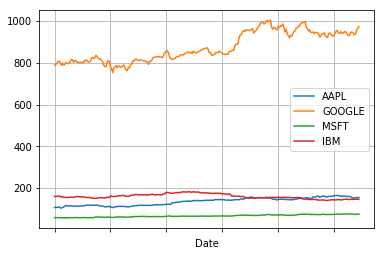

In [18]:
stocks.plot(grid = True);

###### As it can be clearly observed above the closing price for google is far higher compared to rest of the other three companies


###### So in order to compare these on similar lines we can use the secondary y axis and do the plotting as below

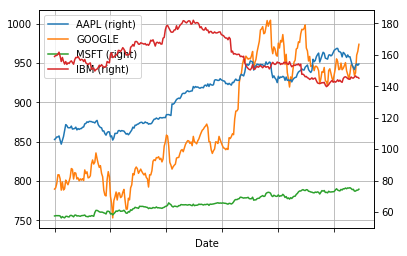

In [19]:
stocks.plot(secondary_y = ['AAPL', 'MSFT', 'IBM'], grid = True);

## Step 5: Let us normalize all the four columns as below :

In [20]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,AAPL,GOOGLE,MSFT,IBM
Date,,,,
2016-08-31,1.000000,1.000000,1.000000,1.000000
2016-09-01,1.005938,1.001962,1.002262,1.004154
2016-09-02,1.015363,1.008888,1.003655,1.004217
2016-09-06,1.015080,1.023004,1.002611,1.009252
2016-09-07,1.021301,1.022966,1.003481,1.017372


###### Now if we plot all the four columns we see that they are on same unit scale and is more easily comparable than before

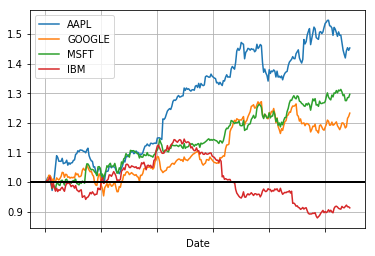

In [21]:
stock_return.plot(grid = True).axhline(y = 1, color = 'black', lw = 2);

## Step 6: Let us apply log transformation using lambda function as below

In [22]:
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change.head()

,AAPL,GOOGLE,MSFT,IBM
Date,,,,
2016-08-31,NaN,NaN,NaN,NaN
2016-09-01,0.005920,0.001961,0.002260,0.004145
2016-09-02,0.009326,0.006888,0.001388,0.000063
2016-09-06,-0.000279,0.013895,-0.001041,0.005002
2016-09-07,0.006109,-0.000037,0.000868,0.008013


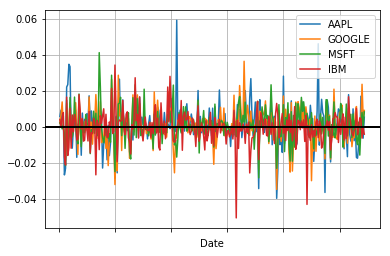

In [23]:
stock_change.plot(grid = True).axhline(y = 0, color = 'black', lw = 2)

##### Let us find the maximum closing price for each company

In [24]:
tech_stocks.loc[:, pd.IndexSlice[:, 'Close']].max()

AAPL    Close     164.050003
GOOGLE  Close    1004.280029
MSFT    Close      75.440002
IBM     Close     181.949997
dtype: float64

In [25]:
returns = pd.DataFrame()

for i in ticker:
    returns[i + ' Return'] = tech_stocks.xs((i, 'Close'), axis = 1).pct_change()
returns.dropna(inplace = True)    

###### The percentage changes of the stock prices for each company

In [26]:
returns.head()

,AAPL Return,GOOGLE Return,MSFT Return,IBM Return
Date,,,,
2016-09-01,0.005938,0.001962,0.002262,0.004154
2016-09-02,0.009369,0.006912,0.001389,0.000063
2016-09-06,-0.000279,0.013992,-0.001040,0.005014
2016-09-07,0.006128,-0.000037,0.000868,0.008045
2016-09-08,-0.026209,-0.006374,-0.003989,-0.016333


## Step 7: Let us use pairplot to understand the correlation between the stock prices.

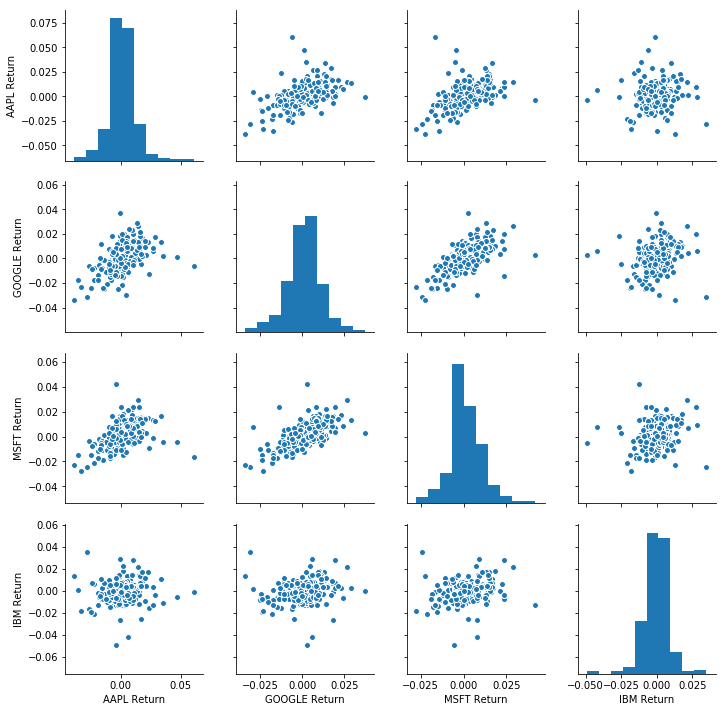

In [27]:
import seaborn as sns
sns.pairplot(returns)

###### As can be seen above most of the stock prices are positively correlated with eachother. Maybe because they all belong to similar domain?

## Step 8: Histogram of returns

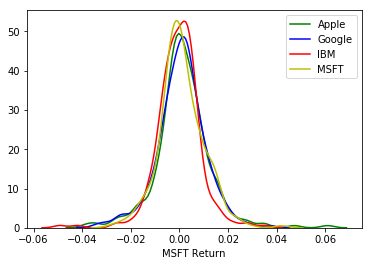

In [28]:
sns.distplot(returns['AAPL Return'], hist = False, color = 'g', label = 'Apple')
sns.distplot(returns['GOOGLE Return'], hist = False, color = 'b', label = 'Google')
sns.distplot(returns['IBM Return'], hist = False, color = 'r', label = 'IBM')
sns.distplot(returns['MSFT Return'], hist = False, color = 'y', label = 'MSFT')

##### Let us find out the day of worst and best returns for each of the four companies

###### Worst performing day :

In [29]:
returns.idxmin()

AAPL Return      2017-06-09
GOOGLE Return    2017-06-09
MSFT Return      2017-05-17
IBM Return       2017-04-19
dtype: object

###### Best performing day :

In [30]:
returns.idxmax()

AAPL Return      2017-02-01
GOOGLE Return    2017-04-28
MSFT Return      2016-10-21
IBM Return       2016-11-10
dtype: object

###### Let's take a look at the Standard deviation of the returns, to understand which stock to be classified as the riskiest over the entire time period

In [31]:
returns.std()

AAPL Return      0.011368
GOOGLE Return    0.009959
MSFT Return      0.009174
IBM Return       0.008962
dtype: float64

###### As per above AAPL seems the most riskiest with a standard deviation of 0.0113

## Step 9 : Let's create a line plot showcasing the closing price for each company for the entire index of time

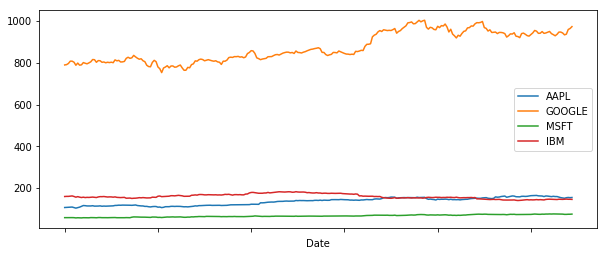

In [32]:
tech_stocks.xs('Close', level = 1, axis = 1).plot(figsize = (10, 4));

## Step 10: Finally let us create a heatmap and clustermap showcasing the correlations between these tech giants on closing prices

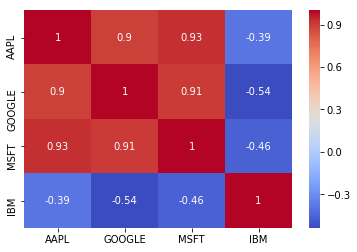

In [33]:
tech_close = tech_stocks.xs('Close', level = 1, axis = 1)
tech_close = tech_close.corr()
sns.heatmap(tech_close, annot = True, vmax = 1, cmap = 'coolwarm');

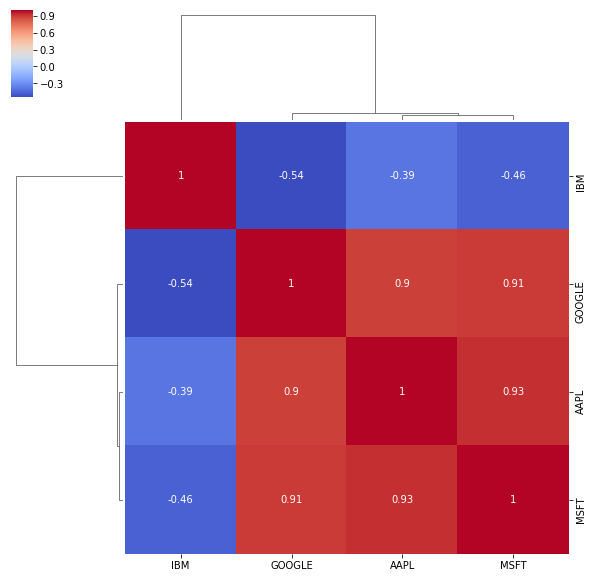

In [34]:
sns.clustermap(tech_close, annot = True, cmap = "coolwarm");